In [1]:
import numpy as np
from pytt.training.tracker import Tracker
import matplotlib.pyplot as plt
tracker = Tracker.load('checkpoints/clinical_bert_mimic_extraction/checkpoint/tracker.pkl')

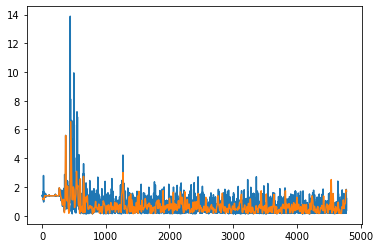

In [2]:
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history], [iterinfo.train_info.batch_info_dict['loss']/iterinfo.train_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history])
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history if iterinfo.val_info is not None], [iterinfo.val_info.batch_info_dict['loss']/iterinfo.val_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history if iterinfo.val_info is not None])
# plt.axis([0,3000,0,1])

In [ ]:
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history], [iterinfo.train_info.batch_info_dict['loss']/iterinfo.train_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history])
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history if iterinfo.val_info is not None], [iterinfo.val_info.batch_info_dict['loss']/iterinfo.val_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history if iterinfo.val_info is not None])
# plt.axis([0,3000,0,1])